In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [9]:
base_dir = os.path.dirname(os.getcwd()) 
file_path = os.path.join(base_dir, 'csv files', 'Competition_Results.csv')

In [10]:
competition_results = pd.read_csv(file_path)

In [11]:
program_count = {
    'men_short' : 0,
    'men_free' : 0,
    'women_short' : 0,
    'women_free' : 0
}

for competition in competition_results['competition']:
    if 'SEG001' in competition or 'data0130' in competition:
        program_count['men_short'] += 1
    elif 'SEG002' in competition or 'data0150' in competition:
        program_count['men_free'] += 1
    elif 'SEG003' in competition or 'data0230' in competition:
        program_count['women_short'] += 1
    elif 'SEG004' in competition or 'data0250' in competition:
        program_count['women_free'] += 1

program_count
    

{'men_short': 4662, 'men_free': 7164, 'women_short': 4445, 'women_free': 7212}

In [12]:
pc_copy = program_count.copy()


for val in pc_copy.keys():
    if 'short' in val:
        pc_copy[val] = pc_copy[val] // 7
    else:
        pc_copy[val] = pc_copy[val] // 12

In [13]:
label_map = {
    "men_short": "Program krótki mężczyzn",
    "men_free": "Program dowolny mężczyzn",
    "women_short": "Program krótki kobiet",
    "women_free": "Program dowolny kobiet"
}

In [14]:
df = pd.DataFrame(pc_copy.items(), columns=['Typ programu', 'Liczba obserwacji'])
df['Typ programu'] = df['Typ programu'].map(label_map)

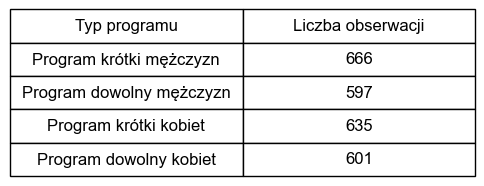

In [15]:
fig, ax = plt.subplots(figsize=(6, 2))  
ax.axis('off')  


table = ax.table(
    cellText=df.values,
    colLabels=['Typ programu', 'Liczba obserwacji'],
    loc='center',
    cellLoc='center',
    colLoc='center'
)

for key, cell in table.get_celld().items():
    cell.set_text_props(color='black')       
    cell.set_edgecolor('black')


table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

plt.show()